In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label_species"]=le.fit_transform(df["species"])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
x=df.drop(columns=["species","label_species"])
y=df["label_species"]

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')

In [16]:
model.fit(xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

In [17]:
ypred=model.predict(xtest)
ypred

array([2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 2, 1, 2, 1, 1])

In [25]:
ytest.value_counts()

2    11
0    10
1     9
Name: label_species, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
cm=confusion_matrix(ytest,ypred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  9]], dtype=int64)

<AxesSubplot:>

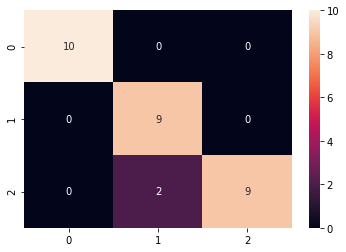

In [20]:
sns.heatmap(cm,annot=True)

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [23]:
acc=accuracy_score(ytest,ypred)
acc

0.9333333333333333